In [249]:
import pickle
import pandas as pd
import os
from explainers.dce import DistributionalCounterfactualExplainer
import torch

In [250]:
data_path = 'data/hotel_booking'

In [251]:
factual = pd.read_csv(os.path.join(data_path,'factual.csv'))
counterfactual = pd.read_csv(os.path.join(data_path,'counterfactual.csv'))

In [252]:
factual

,lead_time,booking_changes,is_canceled
0,77,0,0.427768
1,115,0,0.469284
2,41,0,0.386929
3,27,1,0.141237
4,264,1,0.228443
5,82,0,0.433185
6,0,0,0.165752
7,272,0,0.641276
8,320,0,0.689993
9,0,0,0.165752


In [253]:
counterfactual

,lead_time,booking_changes,is_canceled
0,74.532630,0.046363,0.404522
1,112.283314,0.051332,0.443024
2,35.528794,0.038625,0.330105
3,26.123495,0.999185,0.140603
4,264.243874,1.006445,0.227685
5,79.448915,0.047315,0.409346
6,-2.599798,0.012690,0.148767
7,268.294361,0.072016,0.603999
8,316.521916,0.076973,0.652909
9,-2.668354,0.011313,0.149186


In [254]:
factual['is_canceled'].mean()

0.374961869

In [255]:
counterfactual['is_canceled'].mean()

0.35101465400000004

In [256]:
factual.lead_time.mean()

119.8

In [257]:
counterfactual.lead_time.mean()

117.17091467448968

In [258]:
with open(os.path.join(data_path, 'explainer.pkl'), 'rb') as file:
    explainer = pickle.load(file)

In [259]:
explainer.y_prime

tensor([[0.3422],
        [0.3754],
        [0.3095],
        [0.1130],
        [0.1828],
        [0.3465],
        [0.1326],
        [0.5130],
        [0.5520],
        [0.1326]], requires_grad=True)

In [260]:
explainer.term2

tensor(0.3459)

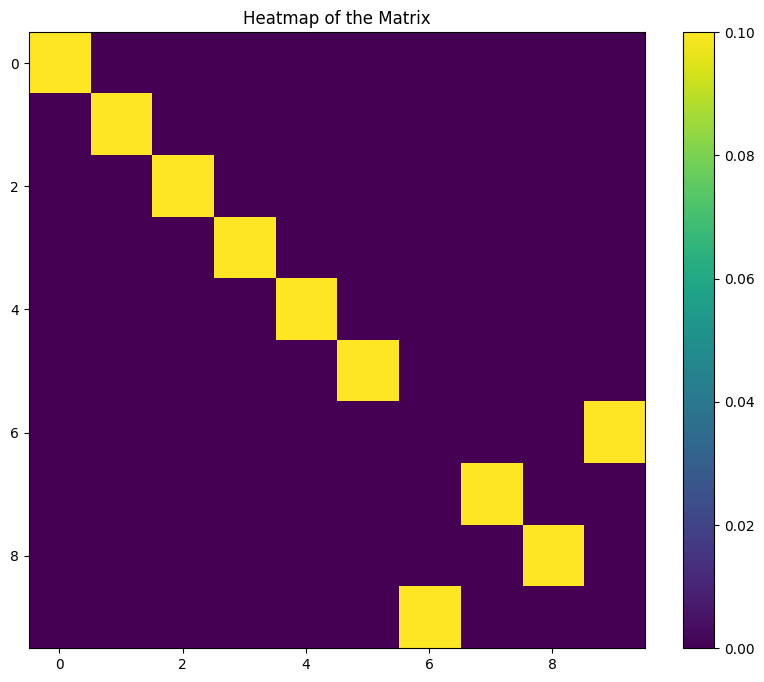

In [261]:
import numpy as np
import matplotlib.pyplot as plt

# Sample matrix for demonstration
matrix = explainer.wd.nu.detach().numpy()

plt.figure(figsize=(10, 8))
plt.imshow(matrix, cmap='viridis')
plt.colorbar()
plt.title("Heatmap of the Matrix")
plt.show()


In [264]:
n, m = explainer.X.shape[0], explainer.X_prime.shape[0]
nu = explainer.wd.nu
term = torch.tensor(0.0, dtype=torch.float)
for i in range(n):
    for j in range(m):
        term += (
            nu[i, j]
            * (explainer.model(explainer.X[i]) - explainer.model(explainer.X_prime[j])) ** 2
        ).item()
term2 = explainer.lambda_val * (explainer.epsilon - term)
term2

tensor(-0.0835)